# **Stage 1: Data Cleaning Pre-processing**

According to the project guidelines the Data Pre-processing (Cleaning)stage involves:

Handling missing values

Removing duplicates

Correcting data types

Creating derived columns

Filtering or aggregating data

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

**Explanation:**

We use:

pandas → for data loading and cleaning

numpy → for numeric operations

matplotlib / seaborn → for quick missing-value or outlier checks

In [3]:
from google.colab import files
uploaded = files.upload()

Saving customerData_500k.csv to customerData_500k.csv


In [4]:
df = pd.read_csv("customerData_500k.csv")

**Explanation:**

Colab uses the files.upload() method to manually upload CSVs.

You can also use Google Drive mount if your dataset is large.

In [5]:
print(df.shape)

(500000, 17)


In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 17 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Age                   500000 non-null  int64  
 1   AnnualIncome          500000 non-null  float64
 2   NumberOfPurchases     500000 non-null  int64  
 3   TimeSpentOnWebsite    500000 non-null  float64
 4   CustomerTenureYears   500000 non-null  float64
 5   LastPurchaseDaysAgo   500000 non-null  int64  
 6   Gender                500000 non-null  object 
 7   ProductCategory       500000 non-null  object 
 8   PreferredDevice       500000 non-null  object 
 9   Region                500000 non-null  object 
 10  ReferralSource        500000 non-null  object 
 11  CustomerSegment       500000 non-null  object 
 12  LoyaltyProgram        500000 non-null  int64  
 13  DiscountsAvailed      500000 non-null  int64  
 14  SessionCount          500000 non-null  int64  
 15  

In [7]:
df.head()

,Age,AnnualIncome,NumberOfPurchases,TimeSpentOnWebsite,CustomerTenureYears,LastPurchaseDaysAgo,Gender,ProductCategory,PreferredDevice,Region,ReferralSource,CustomerSegment,LoyaltyProgram,DiscountsAvailed,SessionCount,CustomerSatisfaction,PurchaseStatus
0,37,57722.57241,19,5.908826,1.093430,11,Male,Furniture,Desktop,South,Paid Ads,Regular,1,5,3,2,1
1,63,21328.92588,10,6.970749,0.649246,20,Female,Furniture,Mobile,East,Organic,VIP,0,4,2,3,0
2,60,150537.74250,19,35.004954,3.858211,25,Male,Electronics,Desktop,South,Organic,VIP,1,2,5,2,0
3,19,63508.76255,10,14.818000,7.554374,20,Male,Furniture,Desktop,West,Paid Ads,Premium,0,0,1,3,0
4,54,100399.55840,19,55.925462,0.197411,92,Male,Electronics,Mobile,South,Referral,Regular,1,4,1,2,0


**Explanation:**

shape → gives dataset size

info() → shows nulls and column types

head() → gives a snapshot of your data

In [8]:
df.isnull().sum()

,0
Age,0
AnnualIncome,0
NumberOfPurchases,0
TimeSpentOnWebsite,0
CustomerTenureYears,0
LastPurchaseDaysAgo,0
Gender,0
ProductCategory,0
PreferredDevice,0
Region,0


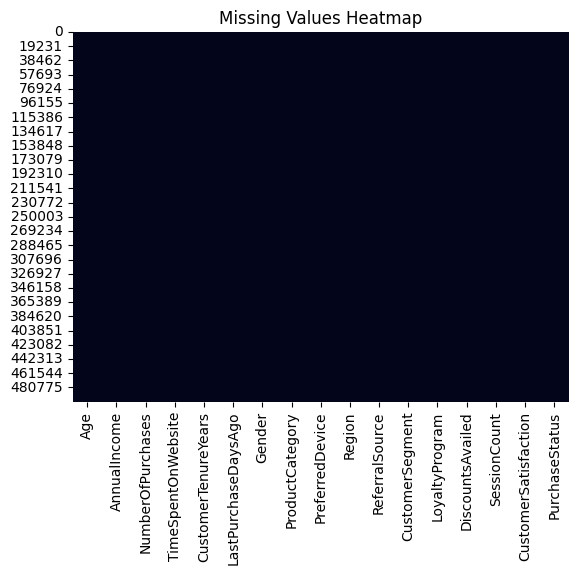

In [12]:
sns.heatmap(df.isnull(), cbar=False)
plt.title("Missing Values Heatmap")
plt.show()

**Explanation:**

You’ll identify columns with missing values to decide what to do next:

Drop rows/columns if they have too many missing values

Fill with mean/median/mode for numeric columns

Fill with “Unknown” for categorical columns

In [13]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

In [14]:
cat_cols = df.select_dtypes(include=['object']).columns
df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])

**Explanation:**

We use median for numeric data (less sensitive to outliers) and mode for categorical data.

In [15]:
before = df.shape[0]
df.drop_duplicates(inplace=True)
after = df.shape[0]

In [16]:
print(f"Removed {before - after} duplicate rows.")

Removed 0 duplicate rows.


**Explanation:**

Remove Duplicates Ensures unique entries (important for customer datasets where repeated IDs may exist).

In [19]:
df['LastPurchaseDaysAgo'] = pd.to_datetime(df['LastPurchaseDaysAgo'], errors='coerce')

In [20]:
df['ProductCategory'] = df['ProductCategory'].astype(str)

**Explanation:**

Data type consistency is vital — dates should be datetime objects, numeric columns should be float/int, etc.

In [23]:
print(df.info())
print(df.describe())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 18 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   Age                   500000 non-null  int64         
 1   AnnualIncome          500000 non-null  float64       
 2   NumberOfPurchases     500000 non-null  int64         
 3   TimeSpentOnWebsite    500000 non-null  float64       
 4   CustomerTenureYears   500000 non-null  float64       
 5   LastPurchaseDaysAgo   500000 non-null  datetime64[ns]
 6   Gender                500000 non-null  object        
 7   ProductCategory       500000 non-null  object        
 8   PreferredDevice       500000 non-null  object        
 9   Region                500000 non-null  object        
 10  ReferralSource        500000 non-null  object        
 11  CustomerSegment       500000 non-null  object        
 12  LoyaltyProgram        500000 non-null  int64         
 13 

,Age,AnnualIncome,NumberOfPurchases,TimeSpentOnWebsite,CustomerTenureYears,LastPurchaseDaysAgo,Gender,ProductCategory,PreferredDevice,Region,ReferralSource,CustomerSegment,LoyaltyProgram,DiscountsAvailed,SessionCount,CustomerSatisfaction,PurchaseStatus,AgeGroup
0,37,57722.57241,19,5.908826,1.093430,1970-01-01 00:00:00.000000011,Male,Furniture,Desktop,South,Paid Ads,Regular,1,5,3,2,1,MidAge
1,63,21328.92588,10,6.970749,0.649246,1970-01-01 00:00:00.000000020,Female,Furniture,Mobile,East,Organic,VIP,0,4,2,3,0,Senior
2,60,150537.74250,19,35.004954,3.858211,1970-01-01 00:00:00.000000025,Male,Electronics,Desktop,South,Organic,VIP,1,2,5,2,0,Senior
3,19,63508.76255,10,14.818000,7.554374,1970-01-01 00:00:00.000000020,Male,Furniture,Desktop,West,Paid Ads,Premium,0,0,1,3,0,Youth
4,54,100399.55840,19,55.925462,0.197411,1970-01-01 00:00:00.000000092,Male,Electronics,Mobile,South,Referral,Regular,1,4,1,2,0,Senior


**Explanation:**

Confirms that:

No missing/duplicate data remains

Data types are correct

Values look reasonable

In [24]:
df.to_csv("cleaned_student_data.csv", index=False)
print("Cleaned dataset saved successfully.")

Cleaned dataset saved successfully.
